In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
from scipy.sparse import csr_matrix
import math
import sklearn


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CHURN PREDICTION/Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1678,1060-ENTOF,Female,1,Yes,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),105.40,7035.6,No
3147,8903-WMRNW,Female,0,Yes,No,15,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,101.75,1669.4,No
1021,3422-WJOYD,Male,0,Yes,No,28,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,54.35,1426.45,No
5628,6821-BUXUX,Female,0,No,No,13,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,96.65,1244.5,Yes
2784,7295-JOMMD,Female,0,No,Yes,4,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.10,396.3,Yes


In [ ]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')>

In [ ]:
#there is no need of CustomerId  so drop it

df.drop('customerID',axis='columns',inplace=True)

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [ ]:
#let's drop this null values

df1=df[df.TotalCharges!=' ']

df1.shape

(7032, 20)

In [ ]:
df1[pd.to_numeric(df1.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#tenure

df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

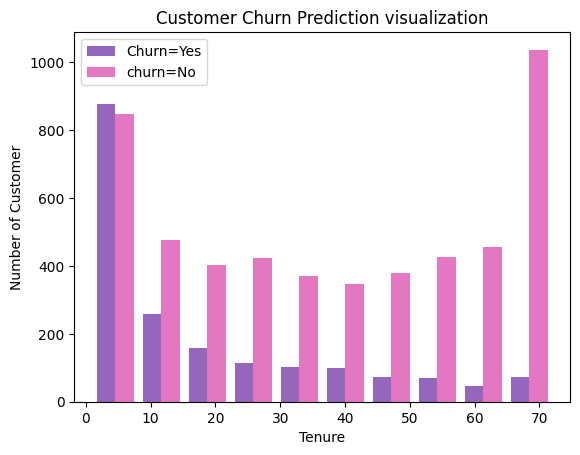

In [ ]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure


plt.xlabel('Tenure')
plt.ylabel('Number of Customer')
plt.title('Customer Churn Prediction visualization')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['C4','C6'],
         label=['Churn=Yes','churn=No'])

plt.legend()

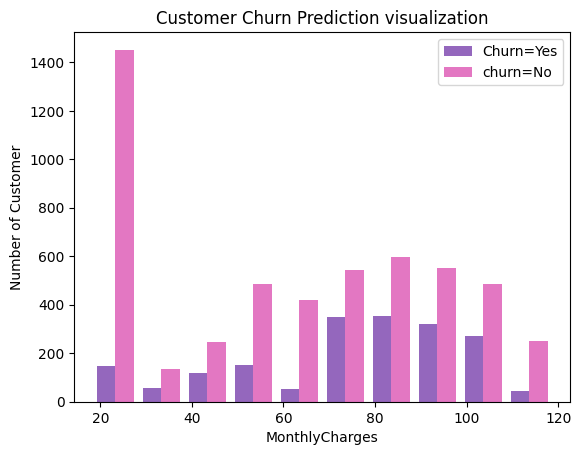

In [ ]:
#sometime if monthly charge is high the customer Churn maybe be high

mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges


plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customer')
plt.title('Customer Churn Prediction visualization')
plt.hist([mc_churn_yes,mc_churn_no],color=['C4','C6'],
         label=['Churn=Yes','churn=No'])

plt.legend()

In [ ]:
def print_unique_col_values(df1):
    for column in df1:
        if df1[column].dtypes=='object':
            print(f'{column}:{df1[column].unique()}')

In [ ]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [ ]:
#No internet service just mean No ,so we can replace it with just No
#also No phone service
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-26-15708417ec8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-26-15708417ec8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [ ]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [ ]:
#We all Know machine learning models do not understand text so we have to convert
#every text or string type of columns to number

#let's covert each yes and no with one and no

yes_no_columns =['Partner','Dependents','PhoneService',
                 'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
                 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-28-e71c6dcc826d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [ ]:
print_unique_col_values(df1)

InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-29-ba153b6b6960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [ ]:
#create dummy columns after oneHotencodein

df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype=float)

df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4200,1,0,0,0,65,0,0,1,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4061,1,0,0,0,14,1,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6231,1,1,1,0,1,1,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5209,0,0,1,0,72,1,1,1,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2.sample(4)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
92,0,0,1,1,0.915493,1,1,1,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1129,0,1,0,0,0.647887,1,1,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3563,0,1,0,0,0.408451,1,1,1,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4068,1,0,1,1,0.183099,1,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
 for column in df2:
    print(f'{column}:{df2[column].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [ ]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [ ]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                   test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
len(X_train.columns)

26

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.4930 - accuracy: 0.7483
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4223 - accuracy: 0.7996
Epoch 3/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4152 - accuracy: 0.8002
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4110 - accuracy: 0.8050
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4088 - accuracy: 0.8089
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4070 - accuracy: 0.8084
Epoch 7/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4031 - accuracy: 0.8094
Epoch 8/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4015 - accuracy: 0.8142
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4001 - accuracy: 0.8132
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3964 - accura

In [ ]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.7555


[0.6700550317764282, 0.7555081844329834]

In [ ]:
yp=model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [ ]:
# yp contain values between 0,1

yp[:5]

array([[3.6823298e-05],
       [5.4732457e-02],
       [9.7664183e-01],
       [3.2223861e-03],
       [3.0623975e-01]], dtype=float32)

In [ ]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

In [ ]:
y_pred=[]

for element in yp:
    if element> 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1033
           1       0.54      0.55      0.54       374

    accuracy                           0.76      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

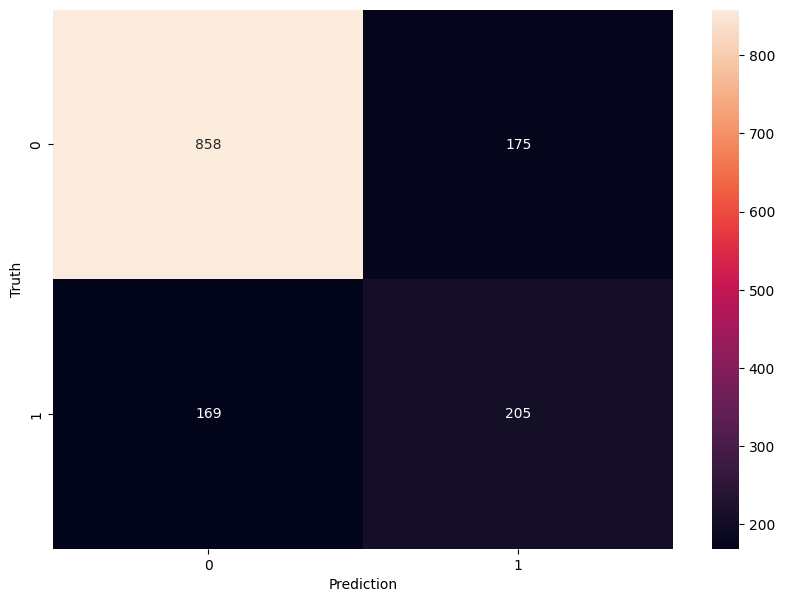

In [ ]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5199 - accuracy: 0.7461
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4659 - accuracy: 0.7794
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4600 - accuracy: 0.7851
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4523 - accuracy: 0.7902
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4472 - accuracy: 0.7942
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4408 - accuracy: 0.7988
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4379 - accuracy: 0.7973
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4339 - accuracy: 0.8015
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4309 - accuracy: 0.8028
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4263 - accura

In [ ]:
print(model.evaluate(X_test, y_test))

y_preds = model.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))

65/65 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7890
[0.5270289182662964, 0.7889641523361206]
65/65 [==============================] - 0s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.77      0.78      1033
           1       0.78      0.81      0.79      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



# SAMBIT PRUSTY ADDED FROM HERE

In [ ]:
# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/CHURN PREDICTION/Telco-Customer-Churn.csv')

# Assuming 'tenure' is the feature to segment customers
# Define tenure thresholds for segmentation
new_threshold = 12
medium_threshold = 24
experienced_threshold = 36

# Create segments based on tenure
segments = {
    'New': df[df['tenure'] <= new_threshold],
    'Medium': df[(df['tenure'] > new_threshold) & (df['tenure'] <= medium_threshold)],
    'Experienced': df[(df['tenure'] > medium_threshold) & (df['tenure'] <= experienced_threshold)],
    'Long-term': df[df['tenure'] > experienced_threshold]
}

# Print the counts in each segment
for segment_name, segment_df in segments.items():
    print(f"{segment_name} segment count: {len(segment_df)}")


New segment count: 2186
Medium segment count: 1024
Experienced segment count: 832
Long-term segment count: 3001


In [ ]:
for segment_name, segment_df in segments.items():
    print(f"Segment: {segment_name}")
    print(segment_df.columns)


Segment: New
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Segment: Medium
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Segment: Experienced
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'Devi

In [ ]:
# Assuming you have segmented your data into different DataFrames and stored them in the 'segments' dictionary

# Define the additional columns needed for segmentation
additional_columns = ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'Segment']

# Loop through each segment and add the missing columns with default values
for segment_name, segment_df in segments.items():
    for column in additional_columns:
        segment_df.loc[:, column] = 0  # Use .loc to set values
 # You can set default values or modify based on your requirements

# Now, the additional columns should be added to each segment DataFrame


In [ ]:
for segment_name, segment_df in segments.items():
    print(f"Segment: {segment_name}")
    print(segment_df.columns)


Segment: New
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Segment'],
      dtype='object')
Segment: Medium
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Segment'],
      dtype='object')
Segment: Experienced


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Churn' is the target variable and 'Segment' is created

# Define features and target variable
features = ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'Segment']
target = 'Churn'

# Assuming you've segmented your data and stored segments in separate dataframes
# segments = {segment_1_df, segment_2_df, ...}

# Loop over segments
for segment_name, segment_df in segments.items():
    X = segment_df[features]
    y = segment_df[target]

    # Convert categorical variables into dummy/indicator variables
    X = pd.get_dummies(X)

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Build the ANN model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate the model
    y_pred = model.predict_classes(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Segment: {segment_name} - Accuracy: {accuracy:.2f}")

    print(classification_report(y_test, y_pred))


Epoch 1/10


UnimplementedError: ignored

In [ ]:
# Assuming 'Churn' is the target variable in your DataFrame
# Replace 'Yes' with 1 and 'No' with 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [ ]:
# Assuming 'Churn' is the target variable in your DataFrame
# Convert 'Churn' column to numeric (0 and 1)
df['Churn'] = (df['Churn'] == 'Yes').astype(int)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Churn' is the target variable and 'Segment' is created

# Define features and target variable
features = ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']
target = 'Churn'

# Assuming you've segmented your data and stored segments in separate dataframes
# segments = {segment_1_df, segment_2_df, ...}

# Loop over segments
for segment_name, segment_df in segments.items():
    X = segment_df[features]
    y = segment_df[target]

    # Convert categorical variables into dummy/indicator variables
    X = pd.get_dummies(X)

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Build the ANN model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

    # Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to classes
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Segment: {segment_name} - Accuracy: {accuracy:.2f}")

    print(classification_report(y_test, y_pred))


Epoch 1/15


UnimplementedError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CHURN PREDICTION/Telco_customer_churn_New.csv')

In [ ]:
df.head

<bound method NDFrame.head of       CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

                    Lat Long   La

In [ ]:
df.shape

(7043, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
x= df.iloc[:, [5,30]].values

In [ ]:
x

array([[90003,    86],
       [90005,    67],
       [90006,    86],
       ...,
       [92304,    71],
       [92305,    59],
       [92308,    38]])

In [ ]:
from sklearn.cluster import KMeans
wcss = []

In [ ]:
for i in range(1,11):
  kmeans = KMeans(n_clusters = 1, init = 'k-means++', random_state =0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

within cluster sum of squares

<function matplotlib.pyplot.show(close=None, block=None)>

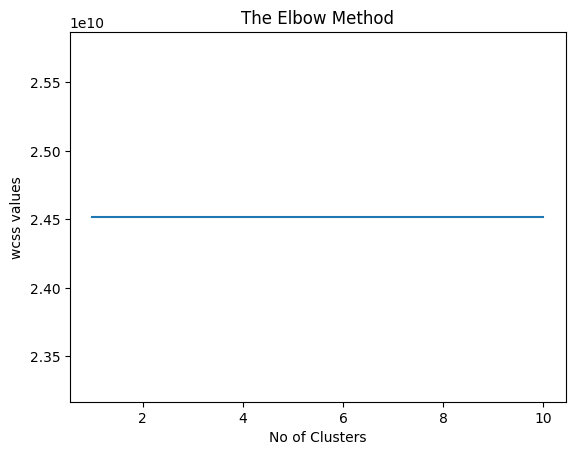

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('wcss values')
plt.show

# 5 CLUSTERS

In [ ]:
kmeansmodel = KMeans(n_clusters = 5, init ='k-means++', random_state = 0)

In [ ]:
y_kmeans = kmeansmodel.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


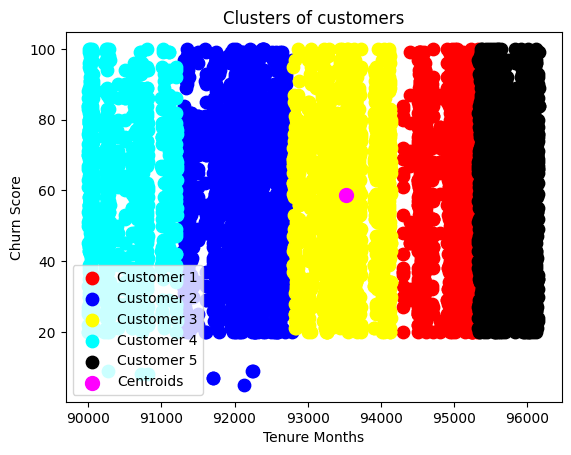

In [ ]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=80, c = "red", label = 'Customer 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=80, c = "blue", label = 'Customer 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=80, c = "yellow", label = 'Customer 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s=80, c = "cyan", label = 'Customer 4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s=80, c = "black", label = 'Customer 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='magenta', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Tenure Months')
plt.ylabel('Churn Score')
plt.legend()
plt.show()

# 4 CLUSTERS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


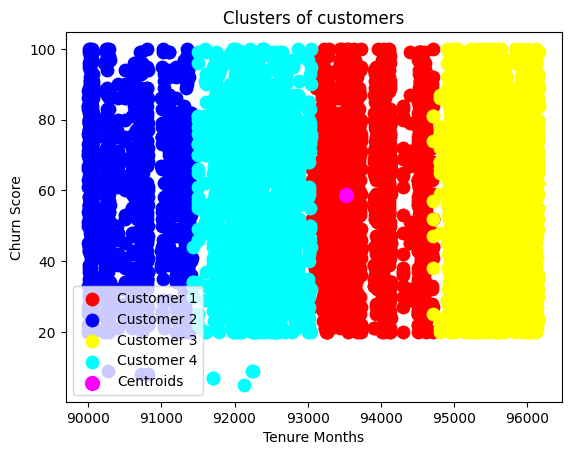

In [ ]:
kmeansmodel2 = KMeans(n_clusters = 4, init ='k-means++', random_state = 0)
y_kmeans = kmeansmodel2.fit_predict(x)

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=80, c = "red", label = 'Customer 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=80, c = "blue", label = 'Customer 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=80, c = "yellow", label = 'Customer 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s=80, c = "cyan", label = 'Customer 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='magenta', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Tenure Months')
plt.ylabel('Churn Score')
plt.legend()
plt.show()

# 7 CLUSTERS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


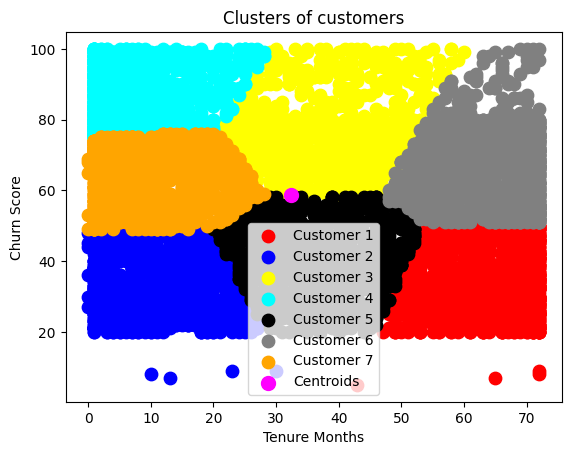

In [ ]:
kmeansmodel3 = KMeans(n_clusters = 7, init ='k-means++', random_state = 0)
y_kmeans = kmeansmodel3.fit_predict(x)

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=80, c = "red", label = 'Customer 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=80, c = "blue", label = 'Customer 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=80, c = "yellow", label = 'Customer 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s=80, c = "cyan", label = 'Customer 4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s=80, c = "black", label = 'Customer 5')
plt.scatter(x[y_kmeans == 5,0], x[y_kmeans == 5,1], s=80, c = "gray", label = 'Customer 6')
plt.scatter(x[y_kmeans == 6,0], x[y_kmeans == 6,1], s=80, c = "orange", label = 'Customer 7')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='magenta', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Tenure Months')
plt.ylabel('Churn Score')
plt.legend()
plt.show()

# 9 CLUSTERS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


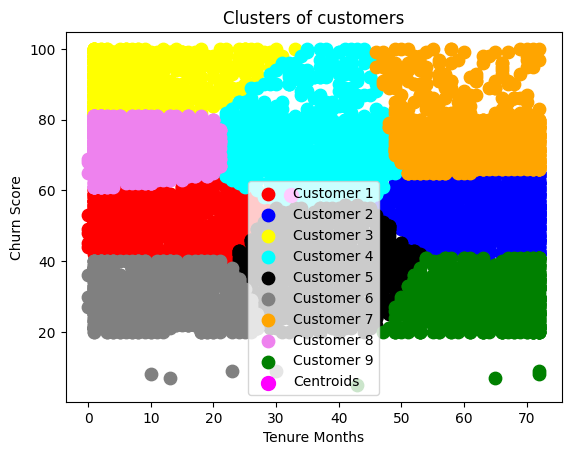

In [ ]:
kmeansmodel4 = KMeans(n_clusters = 9, init ='k-means++', random_state = 0)
y_kmeans = kmeansmodel4.fit_predict(x)

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=80, c = "red", label = 'Customer 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=80, c = "blue", label = 'Customer 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=80, c = "yellow", label = 'Customer 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s=80, c = "cyan", label = 'Customer 4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s=80, c = "black", label = 'Customer 5')
plt.scatter(x[y_kmeans == 5,0], x[y_kmeans == 5,1], s=80, c = "gray", label = 'Customer 6')
plt.scatter(x[y_kmeans == 6,0], x[y_kmeans == 6,1], s=80, c = "orange", label = 'Customer 7')
plt.scatter(x[y_kmeans == 7,0], x[y_kmeans == 7,1], s=80, c = "violet", label = 'Customer 8')
plt.scatter(x[y_kmeans == 8,0], x[y_kmeans == 8,1], s=80, c = "green", label = 'Customer 9')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='magenta', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Tenure Months')
plt.ylabel('Churn Score')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


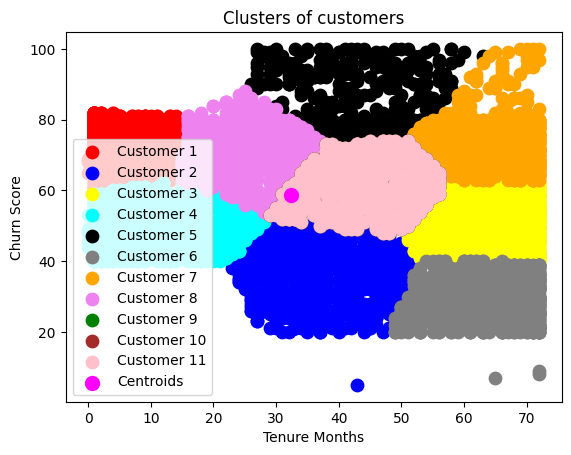

In [ ]:
kmeansmodel5 = KMeans(n_clusters = 11, init ='k-means++', random_state = 0)
y_kmeans = kmeansmodel5.fit_predict(x)

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=80, c = "red", label = 'Customer 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=80, c = "blue", label = 'Customer 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=80, c = "yellow", label = 'Customer 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s=80, c = "cyan", label = 'Customer 4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s=80, c = "black", label = 'Customer 5')
plt.scatter(x[y_kmeans == 5,0], x[y_kmeans == 5,1], s=80, c = "gray", label = 'Customer 6')
plt.scatter(x[y_kmeans == 6,0], x[y_kmeans == 6,1], s=80, c = "orange", label = 'Customer 7')
plt.scatter(x[y_kmeans == 7,0], x[y_kmeans == 7,1], s=80, c = "violet", label = 'Customer 8')
plt.scatter(x[y_kmeans == 8,0], x[y_kmeans == 8,1], s=80, c = "green", label = 'Customer 9')
plt.scatter(x[y_kmeans == 8,0], x[y_kmeans == 8,1], s=80, c = "brown", label = 'Customer 10')
plt.scatter(x[y_kmeans == 8,0], x[y_kmeans == 8,1], s=80, c = "pink", label = 'Customer 11')



plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='magenta', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Tenure Months')
plt.ylabel('Churn Score')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


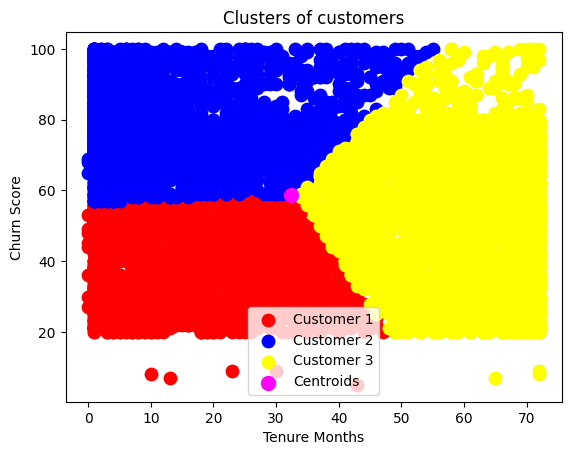

In [ ]:
kmeansmodel6 = KMeans(n_clusters =3, init ='k-means++', random_state = 0)
y_kmeans = kmeansmodel6.fit_predict(x)

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=80, c = "red", label = 'Customer 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=80, c = "blue", label = 'Customer 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=80, c = "yellow", label = 'Customer 3')



plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='magenta', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Tenure Months')
plt.ylabel('Churn Score')
plt.legend()
plt.show()